# Incumplimiento de  pago en clientes con tarjeta de crédito en Taiwan

### Cristina Montoya Uribe
C.C.1037629207

cmontoyau@unal.edu.co

Universidad Nacional de Colombia-Medellín



#### Enlace externo para abrir el documento:
* <a href="http://nbviewer.jupyter.org/github/cmontoyau1993/mlcredict/blob/master/Default_credit_card.ipynb" target="_blank">NBViewer</a>
* <a href="https://github.com/cmontoyau1993/mlcredict/blob/master/Default_credit_card.ipynb" target="_blank">GitHub</a>

**NOTA:** Abrir cualquiera de los dos enlaces, sin embargo, recomiendo el de NBViewer ya que es una vista nativa de Jupyter.

### Fuente de los datos

Los datos se encuentran en el repositorio del Centro de maching learning e inteligencia de sismetamas (UCI Maching Learning Repository-Center For Maching Learning and Intelligent Systems), los datos provienen de una investigación realizada en Taiwan para un reconocido banco. La investigación consistía en predecir la probabilidad real de incumplimiento de pago de los clientes en el pago del próximo mes de su TDC, la investigación se realiza con datos del 2005, se publica en el año 2009 y llega al repositorio en el 2016.

A continuación se adjunto las bibliografías del repositorio y del estudio.


Yeh, I. C., & Lien,Default of credit card clients Data Set (2016), UCI Maching Learning Repository-Center For Maching Learning and Intelligent Systems. https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
https://www.sciencedirect.com/science/article/pii/S0957417407006719


### Problema real

Con los datos que se incluyen en el dataset y utilizando las técnicas de la analítica predictiva se quiere predecir el incumplimiento real de pago de un cliente en su tarjeta crédito a través del análisis de los pagos predeterminados del cliente en meses anteriores, es decir, se quiere medir el riesgo de crédito interpretado como la probabilidad de un retraso en el pago por el desembolso otorgado. Esto se hace desde la perspectiva del control de riesgo donde es más importante predecir la probabilidad de incumplimiento de pago del cliente que clasificar al cliente como riesgoso o no riesgoso. Como respuesta se tiene una variable binaria, el valor de 0 significa que el cliente realiza el pago predeterminado (cumple) y el valor de 1 significa que el cliente no realiza el pago predeterminado (incumple). Se quiere comparar entre las técnicas utilizadas cual de ellas tiene mejor predección.

Cabe anotar que la técnica propuesta por I-Cheng Yeh y Che-hui Lien (2009)- Che-hui Lien-  "Método de suavizado de clasificación" por medio de una red neural  para el pronóstico es el que presenta mayor coeficente de determinacion. Esta técnica no se tendrá en cuenta para la predicción de los datos.

##### Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

### Definición del problema en términos de los datos

Los datos son tomados de un importante banco emisor de tarjetas de crédito en Taiwan para el año 2005.Los datos analizados contienen 30000 mil registros, en los cuales un cliente representa un registro. La variable de respuesta o de clasificación (Y) es binaria, cuando ésta toma el valor de 1 representa el incumplimiento del cliente en el pago de su tarjeta de crédito para el próximo mes y el valor de 0 representa el cumplimiento del cliente en el pago del próximo mes. El modelo  se determinará por las siguientes variables explicativas. Cabe anotar que las variables cualitativas ya se encuentran definidas como factor.


X1-Limit-Base: monto al crédito otorgado (NT dólar), incluye tanto el crédito al consumo individual como el crédito familiar (suplementario).

X2-Sex: sexo (1 = hombre, 2 = mujer).

X3- Education: grado de escolaridad (1 = escuela de postgrado, 2 = universidad; 3 = escuela secundaria; 4 = otros).

X4-Marriage: estado civil (1 = casado, 2 = soltero, 3 = otros).

X5-Age: edad (años).

X6-X11: Historial de pagos anteriores. Registro de pagos anteriores mensuales (de abril a septiembre de 2005):

•	X6-Pay_0: el estado de amortización en septiembre 2005;

•	X7-Pay_2:el estado de amortización en agosto2005;

•	X11-Pay_6: el estado de amortización en abril de 2005.

La escala de medición para el estado de pago es (va desde 0 hasta 9):

0= pagar debidamente

1 = retraso de pago por un mes

2 = retraso de pago por dos meses

8 = retraso de pago por ocho meses

9 = retraso de pago por nueve meses y más.

X12-X17: Saldo de la cuenta (NT dólar) (de abril a septiembre de 2005):

•	X12 = Saldo de la cuenta en septiembre de 2005;

•	X13 = Saldo de la cuenta en agosto,2005;

•	X17 = Saldo de la cuenta en abril de 2005.

X18-X23: Abono del saldo anterior (NT dólar) (de abril a septiembre de 2005):

•	X18 = monto pagado en septiembre de 2005; 

•	X19 = monto pagado en agosto de 2005; 

•	X23 = monto pagado en abril, 2005.

Adicionalmente los datos contienen el ID del cliente, el cual no aporta información al modelo y se eliminará en el proceso de exploración de los datos.

##### Variables cualitativas:

Dentro de las variables cualitativas se tiene el sexo, la educación, estado civil e historial de pagos anteriores para cada uno de los meses.. 

##### Variables cuantitativas

Dentro de las variables cuantitativas se tiene: el monto de crédito otorgado, la edad del cliente, el saldo de la cuenta en cada uno de los meses analizados y el abono de la cuenta  en cada uno de los meses analizados.

Con la variables explicativas se quiere entrenar el modelo de tal manera que se puede predecir la variable de respuesta, es decir, que se pueda decir si el cliente cumplo o incumple con el pago del próximo mes.


# Librerías que se usarán

In [1]:
##
## Eliminamos salida de warnings
##
import warnings as ws
ws.filterwarnings("ignore")

##
## se importan las librerías requerídas
##
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Lectura de los datos

A continuación se inicia el análisis de los datos

In [2]:
##Se cargan los datos
datos_p= pd.read_csv('data/Data_credit1.csv',
                  sep=";")
datos_p.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
###se renombra la variable de respuesta para trabajar con un nombre más corto
datos_p.rename(columns={'default payment next month': 'default'}, inplace=True) 


### Corrección de datos 

Dentro del código se han evidenciado errores de computo los cuales se proceden a corregir. Las variables que se modificaran será educación, estado civil e historial de pagos.

In [4]:

####función para editar los datos en los que se identifican errores en la variable educación se cambia los valores 5,6,0 por 4(otros).
def map_ed(x):
    if(x == 5 or x == 6 or x == 0):
        x = 4
    return x

datos2 = datos_p.copy()
datos2['EDUCATION'] = datos2['EDUCATION'].apply(lambda x: map_ed(x))###aplicación de la función
datos2.EDUCATION.describe()##datos organizados

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [5]:
####función para editar los datos en los que se identifican errores en la estado civil se cambia por el valor de 0 por la categoría 3 otros

def map_m(x):
    if(x == 0):
        x = 3
    return x

datos3 = datos2.copy()
datos3['MARRIAGE'] = datos3['MARRIAGE'].apply(lambda x: map_m(x))
datos3.MARRIAGE.describe()

count    30000.000000
mean         1.557267
std          0.521405
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [6]:
##Corrección de variables PAY_... historial de pagos se cambian los valores -2, -1 por 0 para indicar que el cliente pago a tiempo
def map_p(x):
    if(x == -2 or x == -1 ):
        x = 0
    return x

datos = datos3.copy()
datos['PAY_0'] = datos['PAY_0'].apply(lambda x: map_p(x))
datos['PAY_2'] = datos['PAY_2'].apply(lambda x: map_p(x))
datos['PAY_3'] = datos['PAY_3'].apply(lambda x: map_p(x))
datos['PAY_4'] = datos['PAY_4'].apply(lambda x: map_p(x))
datos['PAY_5'] = datos['PAY_5'].apply(lambda x: map_p(x))
datos['PAY_6'] = datos['PAY_6'].apply(lambda x: map_p(x))


# Exploración y análisis de los datos

La exploración de los datos se hace con el fin de conocer los datos y determinar si se debe hacer transformaciones en éstos, para luego aplicar los modelos.

Inicialmente se corrobora que no existan datos faltantes, en caso de que existan se debe tomar una decisión, si se imputan los datos con alguna técnica como la media o la mediana, o si se eliminan los registros que tienen datos faltantes, posteriormente se realizaría un remuestreo a través de un boostrap con los datos que seleccionados.

In [7]:
###Función de python para determinar que los registros estén completos
datos.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

Como la suma de los faltantes es 0, el dataset se encuentra completo, por tanto se puede usar en su totalidad para todos los métodos y no se requiere utilizar imputación para los datos.

 ### ESTADÍSTICOS GENERALES

Se elimina la variable ID porque no provee información.

In [8]:
####eliminación del ID porque no le aporta información al modelo.
datos=datos.drop(labels="ID", axis=1)

A continuación se realiza una descrición estadística de los datos.

In [9]:
#### Se realiza una descripción estadística inicial de los datos
datos.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,0.356767,0.760594,0.0,0.00,0.0,0.00,8.0
PAY_2,30000.0,0.320033,0.801727,0.0,0.00,0.0,0.00,8.0
PAY_3,30000.0,0.304067,0.790589,0.0,0.00,0.0,0.00,8.0
PAY_4,30000.0,0.258767,0.761113,0.0,0.00,0.0,0.00,8.0
PAY_5,30000.0,0.221500,0.717720,0.0,0.00,0.0,0.00,8.0


Como se puede observar en la tabla los registros para todas las variables se encuentran completos, adicionalmente se puede observar que entre las variables las escalas de los datos son diferentes por esto más adelante se hará una normalización como preparación de los datos para los modelos.

Cabe anotar que si bien todas las variables se encuentran con valores númericos, algunas de ellas son variables categóricas o cualitativas que en vez de tomar una palabra como valor toman es un número, es decir, están convertidas en factor. Por esto es importante recalcar que el análisis anterior solo es válido para las variables cuantitativas.

Con las correcciones realizadas anteriormente se identifica que las variables se encuentrande dentro de los rangos establecidos, esto es posible observarlo revisando el mínimo y el máximo de cada una de las variables.

### Análisis variable de respuesta


Con las siguientes lineas se muestra como se encuentran los datos distribuidos en la variable de respuesta, donde el cumplimiento toma el valor de 0 y el incumplimiento toma el valor de 1.

In [10]:
## categorización del dataset en clientes que cumplen y clientes que no cumplen con el pago del próximo mes
diagnostico= pd.Categorical.from_array(datos.default)
diagnostico.describe()

,counts,freqs
categories,,
0,23364,0.7788
1,6636,0.2212


Como el modelo ya contiene las variables categóricas en factores no es necesario convertirlas, a continuación se mira la gráfica del histograma de la variable de respuesta.

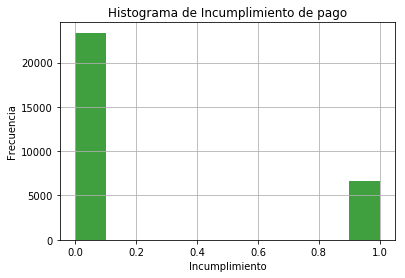

In [11]:
## histograma de la variable de salida
values = datos.default.values ##valores de la variables de resuesta
n, bins, patches = plt.hist(values, 10, facecolor='g', alpha=0.75)
plt.xlabel('Incumplimiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Incumplimiento de pago')
plt.grid(True)
plt.show()


Aproximadamente el 77.8% (23364 clientes) de los clientes analizados realizan su pago predeterminadamente, el  otro 22.1% (6636 clientes) incumplen con el pago predeterminado para el próximo mes. Como los datos se encuentran desbalanceados posteriormente se realizará un balanceo de los datos para examinar los modelos.

## Análisis de los datos sin la variable de respuesta

A continuación se realiza la división de las variables en cualitativas y cuantitativas para su análisis.

### Análisis variables cualitativas

Para analizar las variables cualitativas se recurre al histograma de frecuencias. Estas serán el nivel educativo, el estado civeil, y el historial de pagos durante los seis meses analizados.

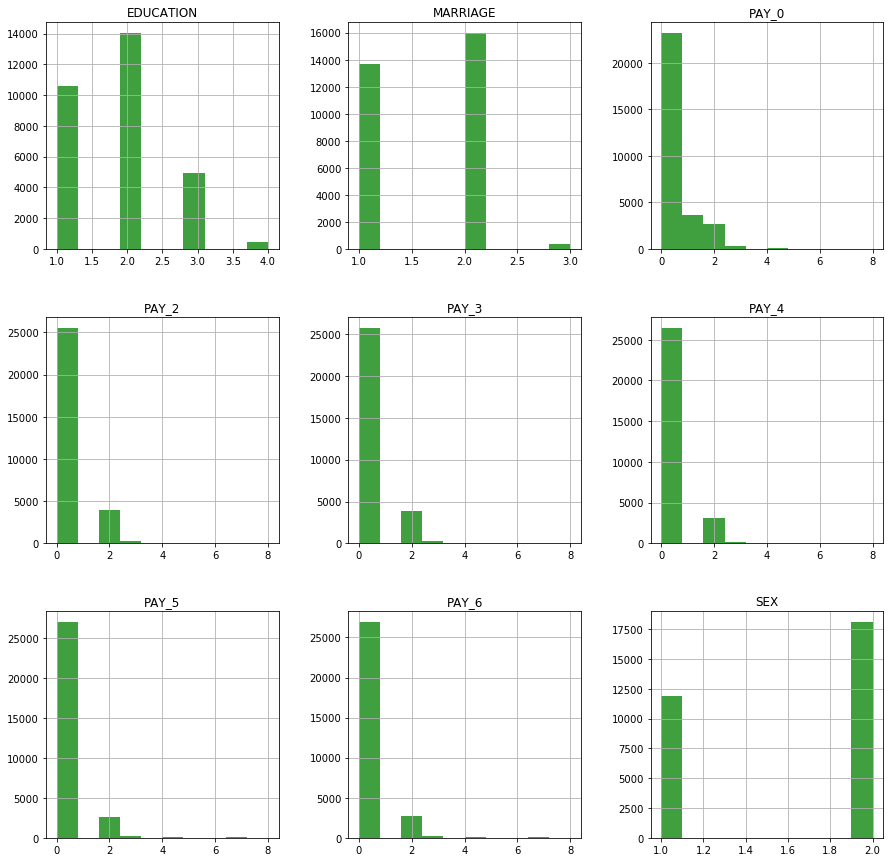

In [12]:
###Histogramas de las variables cualitativas
v_cuali=datos.iloc[:, [1,2,3,5,6,7,8,9,10]] ### Dataframe con las variables cualitativas
v_cuali.hist(bins=10, facecolor='g', alpha=0.75,figsize = (15,15))
plt.grid(True)
plt.show()

Las variables cualitativas nos permiten conocer más sobre el pérfil de los clientes de la base de datos analizada, para este caso hay mayor número de clientes mujeres que hombres, la mayoría de los clientes tienen niveles de educación superior (posgrado y universitarios), hay un número mayor de clientes solteros que en otros estados civiles, por último se puede observar que en el historial de pagos para todos los meses (abril a septiembre de 2005) los clientes están en su gran mayoría con pagos al día, es decir, en el estado 0.

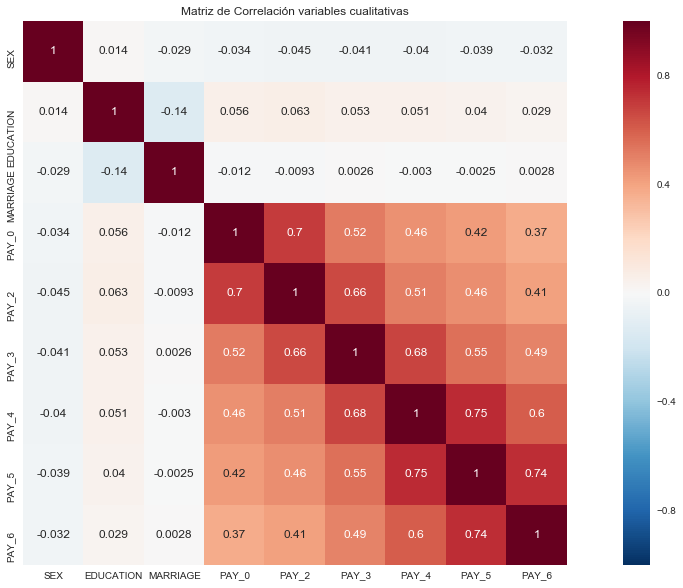

In [13]:
## Matriz de correlación para variables cualitativas
import seaborn as sns

plt.figure(figsize = (20,10))
matriz=sns.heatmap(v_cuali.corr(), square=True, annot=True)
matriz.set_title('Matriz de Correlación variables cualitativas')
plt.show()

Se evidencia correlación entre para el historial de pago, se evidencia que se da correlaciones mayores entre meses consecutivos, el estado de amortización en 3 está más correlacionado con el estado de amortización en 2, así sucesivamente.

### Análisis de variables cuantitativas

A continuación se analizan las variables cuantitativas como edad,cupo, saldos y abonos.

In [14]:
###Agrupación en un dataset de las variables cuantitativas
v_cuan=datos.iloc[:, [0,4,11,12,13,14,15,16,17,18,19,20,21,22]] 
v_cuan.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


El promedio de la edad de los clientes con tarjeta de crédito es de 35 años con una desviación de más o menos 9 años, el promedio del cupo de una tarjeta de crédito para un cliente es de 167.484 dólares, el saldo mensual oscila en un rango entre los $40000 y $50000 dólares, y los abonos entre $4800 y $6000 dólares mensuales.

### Escalamiento de las variables cuantitativas

Se escalan los datos de las variables cuantitativas para que se puedan obsrvar mejor en el análisis.

In [15]:
###Se escalan las variables categóricas para mirar el gráfico 
v_cuan_nombres = v_cuan.columns
scaler = MinMaxScaler()
v_cuan= scaler.fit_transform(v_cuan)
v_cuan = pd.DataFrame(v_cuan, columns=v_cuan_nombres)

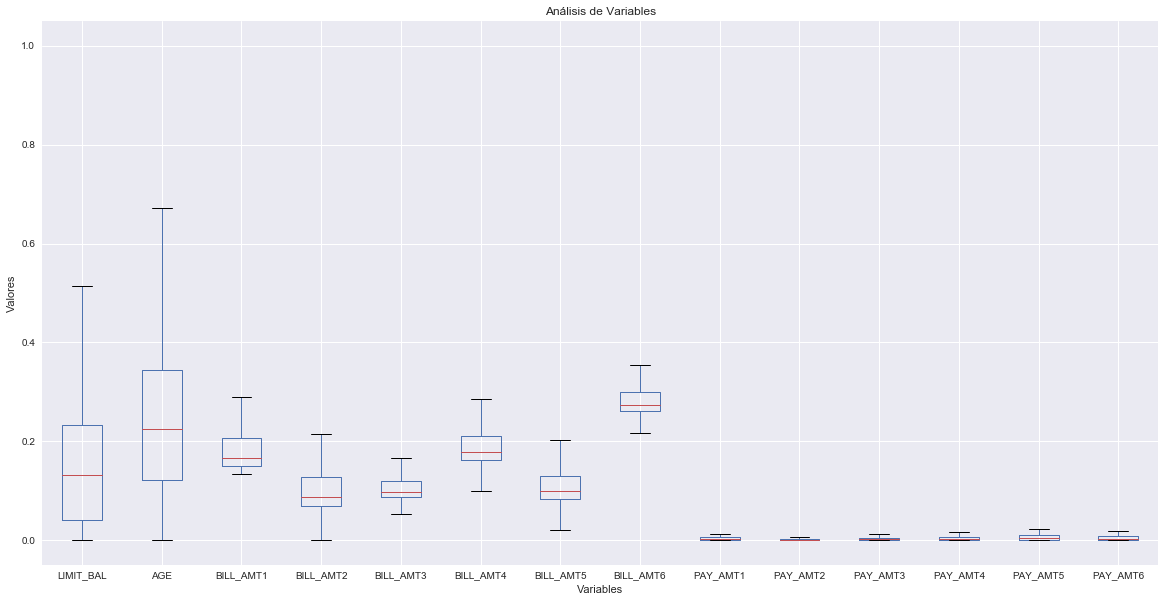

In [16]:
### Boxplot de las variables cuantitativas
plt.figure(figsize=(20,10))
v_cuan.boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Análisis de Variables')
plt.grid(True)
plt.show()


Como se puede observar todas las variables presentan puntos atípicos, estos comportamientos pueden ser normales pues se deben a comportamiento crediticio, es de esperar que en las variables de saldos y abonos existan puntos que sean atípicos  correspondientes a personas con saldos muy grandes al igual que los abonos. Los saldos negativos pueden existir y se debe a que la persona pudo hacer un abono mayor al saldo que tenía.

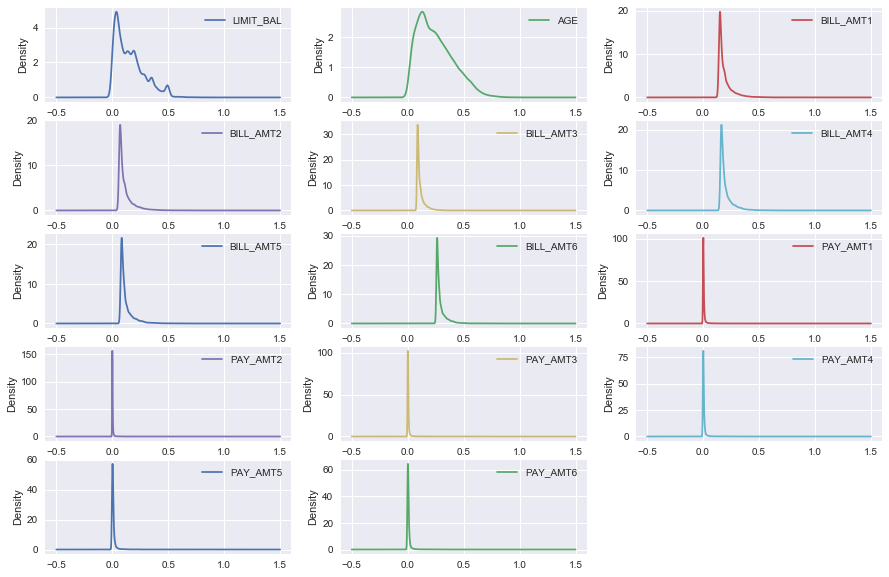

In [17]:
### Grpafico de densidad de las variables cuantitativas
v_cuan.plot(kind='density', subplots= True, layout=(17,3), sharex=False, figsize=(15,35))
plt.show()

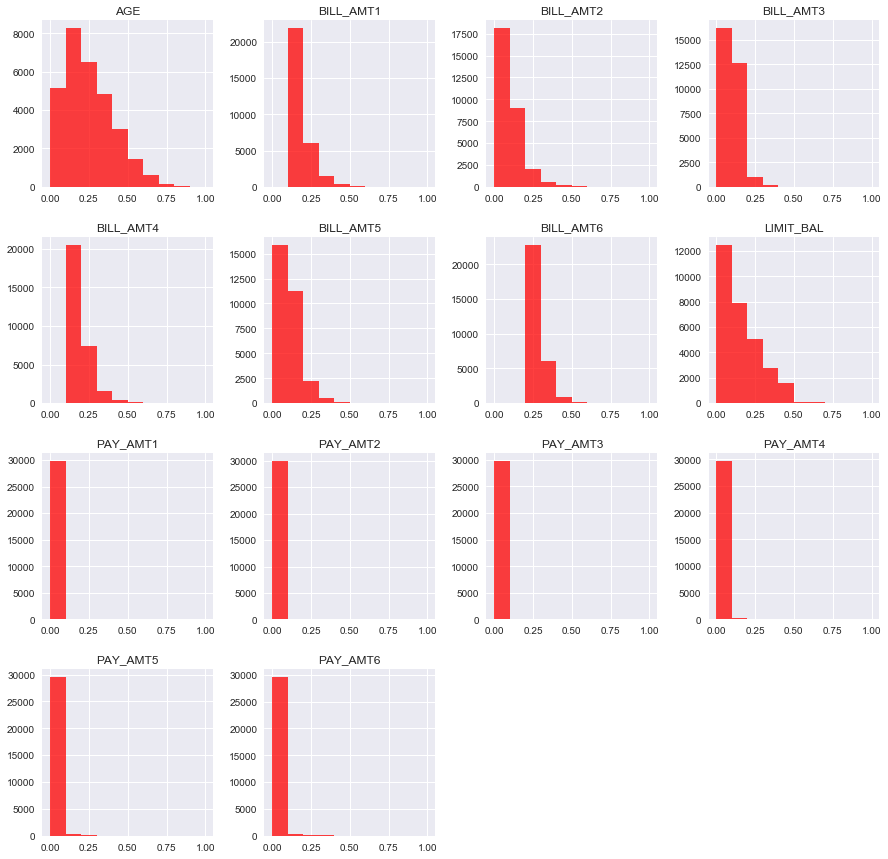

In [18]:
##Histograma variables cuantitativas
v_cuan.hist(bins=10, facecolor='r', alpha=0.75,figsize = (15,15))
plt.grid(True)
plt.show()

Claramente se puede observar que las variables cuantitativas no se comportan de manera normal, la mayoría de ellas presenta valores atípicos y sesgo hacio la derecha, con una concentración de datos en valores muy pequeños que incluyen el valor medio. Se puede observar que la distribuciones de los saldos son parecidas en todos los meses al igual que las distribuciones de los abonos.Para tener una mejor proporción de los datos se decide escalar las variables entre (0-1).

### Correlación entre variables cuantitativas

In [19]:
##Correlación entre las variables cuantitativas
v_cuan.corr()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


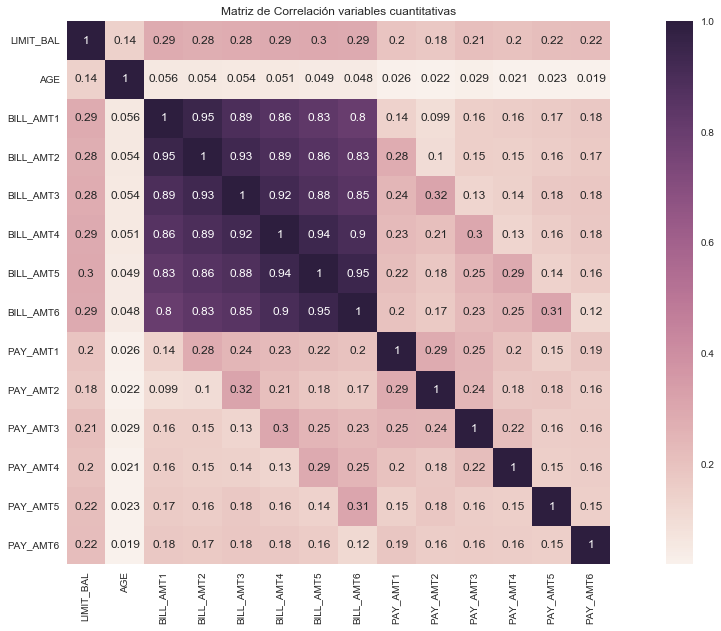

In [20]:
###Mapa de calor y correlación entre las variables
import seaborn as sns

plt.figure(figsize = (20,10))
matriz=sns.heatmap(v_cuan.corr(), square=True, annot=True)
matriz.set_title('Matriz de Correlación variables cuantitativas')
plt.show()

Los valores que tienen color más oscuro significa que las variables implicadas tienen una mayor correlación, para este caso las variables que están más correlacionadas son las que muestran mes a mes el saldo de la cuenta, es decir el saldo en septiemnbre tiene una correlación positiva con el saldo en el mes anterior agosto, por el contrario los abonos que de dan mensualmente tienen muy baja correlación entre ellos.

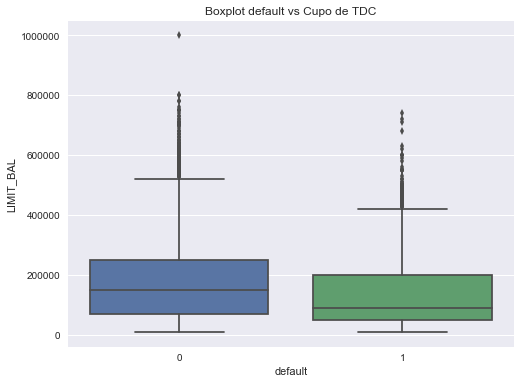

In [21]:
### Boxplot para análisis de algunos variables cuantitativas con la variable de respuesta
car = 'default'
data = pd.concat([datos['LIMIT_BAL'], datos[car]], axis =1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x=car, y='LIMIT_BAL', data = data)
fig.set_title('Boxplot default vs Cupo de TDC')
#fig.axis(ymin=10000, ymax=1000000)



Como se puede observar los clientes con probabilidad de incumplimiento de pago tienen menor cupo de crédito qur los clientes con cumplimiento de pago.

### Aplicación de metodologías

Con el fin de hacer una simulación de los datos se decide sacar el 10% de los registros para probar en productivo el modelo.

Es necesario aclarar que lo más importante para el modelado es aumentar la precisión para la clase 1, incumplimiento de pago en el próximo mes. La decisión que se toma es que así se pierda precisión para la clase 0 cumplimiento de pago en el próximo mes y por tanto en el modelo en general, prevalecerá el modelo en que la clase 1 tenga mejor precisión y recall.

La clase 1 es la más critica para el modelo,por una parte se encuentra desbalanceada y por otra parte es la que predice si el cliente entra en mora en el próximo pago, es decir, es la que representa más dinero para el modelo.

In [22]:
###### base oculta para simular el modelo en productivo 
oculto=datos.sample(frac=0.1, random_state=15)###datos para simular el modelo en productivo
index1=oculto.index ##número de las filas 
datos=datos.drop(labels=index1, axis=0)#eliminación de los datos ocultos 
datos.describe().transpose() ###resumen de los datos para el modelado



,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,27000.0,167338.506667,129641.892269,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,27000.0,1.603630,0.489152,1.0,1.00,2.0,2.00,2.0
EDUCATION,27000.0,1.842593,0.744699,1.0,1.00,2.0,2.00,4.0
MARRIAGE,27000.0,1.559667,0.521470,1.0,1.00,2.0,2.00,3.0
AGE,27000.0,35.461000,9.210022,21.0,28.00,34.0,41.00,79.0
PAY_0,27000.0,0.354481,0.754562,0.0,0.00,0.0,0.00,8.0
PAY_2,27000.0,0.317741,0.796747,0.0,0.00,0.0,0.00,8.0
PAY_3,27000.0,0.303222,0.789541,0.0,0.00,0.0,0.00,8.0
PAY_4,27000.0,0.259519,0.762431,0.0,0.00,0.0,0.00,8.0
PAY_5,27000.0,0.221185,0.719352,0.0,0.00,0.0,0.00,8.0


Se puede observar que se trabajará con el 90% de los datos originales para el modelado y el 10% restante se utilizará para simular una prueba en producción.

### Prueba del modelo sin balancear

In [23]:
####Preparación de los datos para la normalización
y = datos.loc[:,"default"]   # Vaiable de respuesta
x=datos.drop(labels="default", axis=1)# datos para la predicción
x_nombres = x.columns    # Nombres caracteristicas para predicción

In [24]:
###Función para escalar los datos
scaler = MinMaxScaler()##método utilizado
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x_nombres)

In [25]:
##SE PARTE LOS DATOS EN 75% DE ENTRENAMIENTO Y 25% PRUEBA con cross validation
import warnings as ws
ws.filterwarnings("ignore")

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train_true, y_test_true = train_test_split(
    x_scaled, y,      # datos originales
    test_size=0.25,   # float/int, tamaño de la muestra de prueba
    random_state=55) 

La función aplicada a continuación muestra un resumen de todos los modelos probados con sus métricas de error fue realizada por el compañero Denis Alexander Zuluaga.

In [27]:
## Función para varios modelos

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

##
print(__doc__)
class_names = np.array(list(set(y_test_true.values)))
model_names = ["KNeighbors", "GradientBoosting", "RandomForest", "DecisionTree", "LR"]
model_instances = [KNeighborsClassifier(),
                   GradientBoostingClassifier(),
                   RandomForestClassifier(),
                   DecisionTreeClassifier(),
                   LogisticRegression()]
model_list = zip(model_names, model_instances)
model_report = pd.DataFrame(data = [], index = model_names, columns = ["Accuracy", "ErrorRate", "JaccardSim","Recall","Precision"])
for (name, clf) in model_list:
    clf.fit(x_train, y_train_true)   # Entreno el modelo correspondiente
    y_test_pred = clf.predict(x_test)  # Predicción para el conjunto de prueba
    #cnf_matrix = confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)   # Métricas de desempeño
    class_report = classification_report(y_true=y_test_true, y_pred=y_test_pred)   # Reporte de precisión del clasificador
    
    # Computa la tasa de éxito
    model_report.loc[name,"Accuracy"] = accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
    # Tasa de error
    model_report.loc[name,"ErrorRate"] = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
     # Similitud Jaccard
    model_report.loc[name,"JaccardSim"] = jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)
    #Recall
    model_report.loc[name,"Recall"] = recall_score(y_true=y_test_true, y_pred=y_test_pred)
    #Precisión
    model_report.loc[name,"Precision"] = precision_score(y_true=y_test_true, y_pred=y_test_pred)
  

model_report


Automatically created module for IPython interactive environment


,Accuracy,ErrorRate,JaccardSim,Recall,Precision
KNeighbors,0.792741,0.207259,0.792741,0.339456,0.538296
GradientBoosting,0.823852,0.176148,0.823852,0.368027,0.675406
RandomForest,0.809333,0.190667,0.809333,0.327211,0.617458
DecisionTree,0.723111,0.276889,0.723111,0.398639,0.373011
LR,0.819407,0.180593,0.819407,0.320408,0.681621


El recall del modelo es decir la precisión sobre la misma clase es muy baja esta es la métrica que nos interesa, por eso se decide balancear los datos para obtener un mejor recall, cabe aclarar que los valores de precisión y recall son los de la clase con más error de pronóstico.

### Banlanceo de los datos

En la exploración del conjunto de datos se identifica que es necesario balancear los datos para alcanzar una mejor precisión en el modelo, a continuación se realiza el balanceo de los datos en el conjunto de entrenamiento.Para esto se aplicará la normalización de los datos.

### Normalización de los datos- Escalamiento

Como las variables cualitativas se encuentran en factor se decide escalar tanto las variables cualitativas como cuantitativas para tener una mejor precisión en el modelo. Esto se hace con el fin de que al tener las variables cualitativas convertidos en factor no tomen mayor peso al escalar las cuantitativas, es decir,  se aplica el escalamiento para que tanto variables cualitativas como cuantitativas queden en la misma escala.

Se utiliza el método de MinMaxScaler

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [28]:
###Preparación de los datos para la normalización
y = datos.loc[:,"default"]   # Vaiable de respuesta
x=datos.drop(labels="default", axis=1)# datos para la predicción
x_nombres = x.columns 

In [29]:
###Aplicación del método de escalamiento
scaler = MinMaxScaler()##método utilizado
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x_nombres)

### Partición de los datos

In [30]:
##SE PARTE LOS DATOS EN 75% DE ENTRENAMIENTO Y 25% PRUEBA con cross validation
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train_true, y_test_true = train_test_split(
    x_scaled, y,      # datos originales
    test_size=0.25,   # float/int, tamaño de la muestra de prueba
    random_state=55) 

In [31]:
###Entradas y salidas de la función que balanceará los datos con los datos de entrenamiento del modelo
entradas = x_train[x_train.columns[:23]].as_matrix()
salidas = y_train_true.as_matrix()


La librería Skelearn provee diferentes técnicas para el balanceo de los datos entre éstas se encuentran:
- Smote: es una combinación entre un balanceo hacia abajo y hacia arriba
- Adasyn: es una combinación entre un balanceo hacia abajo y hacia arriba
- RamdonOverSampler: es un balanceo hacia arriba
- RamdonUnderSampler: es un balanceo hacia arriba
- Smoteenn: combina balanceo hacia arriba y hacia abajo con vecinos más cercanos.

Para el caso de análisis se seleccionó el Smoteen porque presenta una combinación de métodos que beneficia la precisión y el recall del modelo.

In [32]:
###Método para balancear los datos
##importación de librerías
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

#ros=RandomUnderSampler(random_state=0, replacement=True)
#ros =SMOTE(ratio='minority', kind='borderline1', random_state=55) 
#ros=CondensedNearestNeighbour(random_state=0)
#ros=NearMiss(random_state=0, version=1)

###Definición del método y aplicación
ros = SMOTEENN(random_state=0)##Método utilizado
x_resample, y_resample = ros.fit_sample(entradas, salidas)##Aplicación del método
entradas = x_resample##datos balanceados
salidas = y_resample##variable de salida balanceada



Los datos se encuentra balanceados.

### Se organiza el set de entrenamiento balanceado para introducirlo a los modelos

In [33]:
###Preparación de los datos para aplicación de los modelos 
y_train_true =salidas   # Vaiable de respuesta
x1=datos.drop(labels="default", axis=1)# datos para la predicción
x_nombres = x1.columns  
x_train=pd.DataFrame.from_records(entradas)


## Metodologías utilizadas para modelar

A continuación se listan las metodologías usadas

- Vecinos más cercanos KNN
- Regresión logística
- Árbol de clasificación
- RandomForest
- Gradient Tree Boosting


A continuación se toman las variables de respuesta del balanceo y se organizan para aplicar las metodologías elegidas, cabe aclarar que el balanceo sólo se le realizó al set de entrenamiento

## Aplicación de los métodos sin cross validation

Se aplica la siguiente función para sacar las precisiones de todos los modelos

In [34]:
from sklearn.linear_model import LogisticRegression


## Entrena todos los modelos de una lista

##
print(__doc__)
class_names = np.array(list(set(y_test_true.values)))
model_names = ["KNeighbors", "GradientBoosting", "RandomForest","DecisionTree", "LR"]
model_instances = [KNeighborsClassifier(),
                   GradientBoostingClassifier(),
                   RandomForestClassifier(),
                   DecisionTreeClassifier(),
                   LogisticRegression()]

model_list = zip(model_names, model_instances)
model_report = pd.DataFrame(data = [], index = model_names, columns = ["Accuracy", "ErrorRate", "JaccardSim","Recall","Precision"])
for (name, clf) in model_list:
    clf.fit(x_train, y_train_true)   # Entreno el modelo correspondiente
    y_test_pred = clf.predict(x_test)  # Predicción para el conjunto de prueba
    #cnf_matrix = confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)   # Métricas de desempeño
    class_report = classification_report(y_true=y_test_true, y_pred=y_test_pred)   # Reporte de precisión del clasificador
    
    # Computa la tasa de éxito
    model_report.loc[name,"Accuracy"] = accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
    # Tasa de error
    model_report.loc[name,"ErrorRate"] = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
     # Similitud Jaccard
    model_report.loc[name,"JaccardSim"] = jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)
    #Recall
    model_report.loc[name,"Recall"] = recall_score(y_true=y_test_true, y_pred=y_test_pred)
    #Precisión
    model_report.loc[name,"Precision"] = precision_score(y_true=y_test_true, y_pred=y_test_pred)
  

model_report


Automatically created module for IPython interactive environment


,Accuracy,ErrorRate,JaccardSim,Recall,Precision
KNeighbors,0.613778,0.386222,0.613778,0.682993,0.319237
GradientBoosting,0.730519,0.269481,0.730519,0.629252,0.420646
RandomForest,0.741778,0.258222,0.741778,0.582993,0.431303
DecisionTree,0.685926,0.314074,0.685926,0.593878,0.364357
LR,0.739111,0.260889,0.739111,0.636735,0.432732


Si bien los indicadores de error con los datos balanceados tienen una dismunición respecto a los datos originales, lo que se pretendía hacer con el balanceo de los dato se logró, era poder tener un mayor recall. Es decir que se tuviera una mejor predicción para la clase 1, incumplimiento del pago en el próximo mes. En este caso el recall hace referencia a la clase con más bajo scoreal igual que la predicción.

## Ajuste de hiperparámetros del modelo y cross-validation

Función para aplicar los hiperparametros y el cross validation para todos modelos se realizarán 3 corridas con el fin de obtener los hiperparametros que dan el mejor modelo, la función es realizada por Denis Alexander Zuluaga. 

La output de la función es los score del modelo y los mejores hiperparámetros.

In [35]:
import warnings as ws
ws.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier


##Función para ajustar hiperparametros y crossvalidation a todos los modelos

def grid_search(classifier,
                tuned_params,
                scores):
    
    for score in scores:
        print()
        print("Parámetros ajustados: %s" % score)
        print()

        # Entrenamiento utilizando cross-validation (folds = 3)
        clf = GridSearchCV(classifier, tuned_params, cv=3, scoring='%s_macro' % score, n_jobs=3)
        clf.fit(x_train, y_train_true)
        print("Mejores parámetros encontrados:")
        print(clf.best_params_)
        print()
        # Predicción con datos de prueba
        y_true, y_pred = y_test_true, clf.predict(x_test)
        print("Detalle del proceso:")
        print()
        print(classification_report(y_true, y_pred))
        print()
    
    

### Método KNN

Los hiperparametros seleccionados para variar el modelo serán el algoritmo, la metrica y el número de vecinos, solo se harán 3 folds por la capacidad de computo requerida.

In [36]:
# Definicón de los hiperparametros para las corridas
tuned_params = [{'algorithm': ['ball_tree'], 'metric': ['manhattan'], 'n_neighbors': [10, 15, 20]},
                    {'algorithm': ['kd_tree'],'n_neighbors': [10, 15, 20, 25]}]
## Metricas de evaluar predicción
scores = ['precision', 'recall']

# Aplicamos el modelo
grid_search(KNeighborsClassifier(), tuned_params, scores)



Parámetros ajustados: precision

Mejores parámetros encontrados:
{'algorithm': 'kd_tree', 'n_neighbors': 10}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.87      0.62      0.73      5280
          1       0.33      0.67      0.44      1470

avg / total       0.75      0.63      0.66      6750



Parámetros ajustados: recall

Mejores parámetros encontrados:
{'algorithm': 'kd_tree', 'n_neighbors': 10}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.87      0.62      0.73      5280
          1       0.33      0.67      0.44      1470

avg / total       0.75      0.63      0.66      6750




Utilizando cross validation y ajustando los hiperparametros del modelo, su precisión es del 76%, esto se debe a que para la variable de repuesta en la categoría 1 el modelo es mucho más impreciso que para la categoría 0. El recall del modelo es del 65% esta medida hace referencia a la comparación del pronóstico solo con su categoría. Para el caso analizado, el balanceo de los datos aumentó tanto la precisión como el recall de los datos. En conclusión con crosvalidation utilizado el número de vecinos que se debe utilizar para el modelo son 10 con el algoritmo Kd_tree.

### Método de Regresión logísitica

Los hiperparametros seleccionados para variar el modelo será el solver y el random_state.

In [37]:
# Definicón de los hiperparametros para las corridas
tuned_params = [{'solver': ['liblinear','newton-cg','saga','sag'],'random_state': [0,15,20,55]}]
## Metricas de evaluar predicción
scores = ['precision', 'recall']

# Aplicamos el modelo
grid_search(LogisticRegression(), tuned_params, scores)


Parámetros ajustados: precision

Mejores parámetros encontrados:
{'random_state': 0, 'solver': 'sag'}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.88      0.77      0.82      5280
          1       0.43      0.64      0.51      1470

avg / total       0.79      0.74      0.75      6750



Parámetros ajustados: recall

Mejores parámetros encontrados:
{'random_state': 0, 'solver': 'sag'}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.88      0.77      0.82      5280
          1       0.43      0.64      0.51      1470

avg / total       0.79      0.74      0.75      6750




Utilizando cross validation y ajustando los hiperparametros del modelo, su precisión es del 79%, esto se debe a que para la variable de repuesta en la categoría 1 el modelo es mucho más impreciso que para la categoría 0. El recall del modelo es del 74% esta medida hace referencia a la comparación del pronóstico solo con su clase. Para el caso analizado, el balanceo de los datos aumentó tanto la precisión como el recall de los datos. En conclusión con crosvalidation se decide que el solver a utilizar es 'sag' y un random_state=0.

### Método de Árbol de decisión

Los hiperparametros seleccionados para variar el modelo será el max_depth y el random_state.

In [38]:
# Definicón de los hiperparametros para las corridas
tuned_params = [{'max_depth': [2, 5, 10],'random_state': [0,15,20,55]}]
## Metricas de evaluar predicción
scores = ['precision', 'recall']

# Aplicamos el modelo
grid_search(DecisionTreeClassifier(), tuned_params, scores)


Parámetros ajustados: precision

Mejores parámetros encontrados:
{'max_depth': 10, 'random_state': 55}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.88      0.71      0.79      5280
          1       0.39      0.66      0.49      1470

avg / total       0.77      0.70      0.72      6750



Parámetros ajustados: recall

Mejores parámetros encontrados:
{'max_depth': 10, 'random_state': 0}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.88      0.71      0.79      5280
          1       0.39      0.66      0.49      1470

avg / total       0.78      0.70      0.72      6750




Utilizando cross validation y ajustando los hiperparametros del modelo, su precisión es del 78%, esto se debe a que para la variable de repuesta en la categoría 1 el modelo es mucho más impreciso que para la categoría 0. El recall del modelo es del 70% esta medida hace referencia a la comparación del pronóstico solo con su clase. Para el caso analizado, el balanceo de los datos aumentó tanto la precisión como el recall de los datos. En conclusión con crosvalidation se decide que los hiperparámetros a utilizar es max_depth= 10  y random_state=0, pues nos interesa aumentar el recall.

### Método de Random forest

Los hiperparametros seleccionados para variar el modelo será el max_depth, n_estimators y el random_state.

In [39]:
# Definicón de los hiperparametros para las corridas
tuned_params = [{'max_depth': [2, 5, 10],'n_estimators': [10,20, 40,60],'random_state': [0,15,20,55]}]
## Metricas de evaluar predicción
scores = ['precision', 'recall']

# Aplicamos el modelo
grid_search(RandomForestClassifier(), tuned_params, scores)


Parámetros ajustados: precision

Mejores parámetros encontrados:
{'max_depth': 10, 'n_estimators': 60, 'random_state': 15}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.88      0.75      0.81      5280
          1       0.42      0.64      0.51      1470

avg / total       0.78      0.73      0.75      6750



Parámetros ajustados: recall

Mejores parámetros encontrados:
{'max_depth': 10, 'n_estimators': 60, 'random_state': 15}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.88      0.75      0.81      5280
          1       0.42      0.64      0.51      1470

avg / total       0.78      0.73      0.75      6750





Utilizando cross validation y ajustando los hiperparametros del modelo, su precisión es del 78%, esto se debe a que para la variable de repuesta en la categoría 1 el modelo es mucho más impreciso que para la categoría 0. El recall del modelo es del 73% esta medida hace referencia a la comparación del pronóstico solo con su clase. Para el caso analizado, el balanceo de los datos aumentó tanto la precisión como el recall de los datos. En conclusión con crosvalidation se decide que los hiperparámetros a utilizar es max_depth= 10, n_estimators = 60, random_state=15, pues nos interesa aumentar el recall.

### Método de GradientBoostingClassifier

Los hiperparametros seleccionados para variar el modelo será el max_depth, n_estimators y el random_state.

In [62]:
# Definicón de los hiperparametros para las corridas
tuned_params = [{'max_depth': [2, 5, 10],'n_estimators': [10,20, 40,60],'random_state': [0,15,20,55]}]
## Metricas de evaluar predicción
scores = ['precision', 'recall']

# Aplicamos el modelo
grid_search(GradientBoostingClassifier(), tuned_params, scores)


Parámetros ajustados: precision

Mejores parámetros encontrados:
{'max_depth': 10, 'n_estimators': 60, 'random_state': 55}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.87      0.80      0.83      5280
          1       0.45      0.58      0.50      1470

avg / total       0.78      0.75      0.76      6750



Parámetros ajustados: recall

Mejores parámetros encontrados:
{'max_depth': 10, 'n_estimators': 60, 'random_state': 55}

Detalle del proceso:

             precision    recall  f1-score   support

          0       0.87      0.80      0.83      5280
          1       0.45      0.58      0.50      1470

avg / total       0.78      0.75      0.76      6750




Utilizando cross validation y ajustando los hiperparametros del modelo, su precisión es del 78%, esto se debe a que para la variable de repuesta en la categoría 1 el modelo es mucho más impreciso que para la categoría 0. El recall del modelo es del 75% esta medida hace referencia a la comparación del pronóstico solo con su clase. Para el caso analizado, el balanceo de los datos aumentó tanto la precisión como el recall de los datos. En conclusión con crosvalidation se decide que los hiperparámetros a utilizar es max_depth= 10, n_estimators = 60, random_state=55, pues nos interesa aumentar el recall.

## Comparación entre métodos utilizados

A continuación con los parámetros encontrados en el los ajustes de los hiperparámetros y el crossvalidation se muestra la consolidación de los resultados, con la siguiente función.

In [64]:



## Función para la condesanción de los modelos

##
print(__doc__)
class_names = np.array(list(set(y_test_true.values)))
model_names = ["KNeighbors", "DecisionTree", "RandomForest","GradientBoosting", "LR"]
model_instances = [KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors=10),
                   DecisionTreeClassifier(max_depth =10, random_state= 0),
                   RandomForestClassifier(max_depth =10, n_estimators= 60, random_state=15),
                   GradientBoostingClassifier(max_depth = 10, n_estimators = 60, random_state=55),
                   LogisticRegression(random_state= 0, solver ='sag')]

model_list = zip(model_names, model_instances)
model_report = pd.DataFrame(data = [], index = model_names, columns = ["Accuracy", "ErrorRate", "JaccardSim","Recall","Precision"])
for (name, clf) in model_list:
    clf.fit(x_train, y_train_true)   # Entreno el modelo correspondiente
    y_test_pred = clf.predict(x_test)  # Predicción para el conjunto de prueba
    #cnf_matrix = confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)   # Métricas de desempeño
    class_report = classification_report(y_true=y_test_true, y_pred=y_test_pred)   # Reporte de precisión del clasificador
    
    # Computa la tasa de éxito
    model_report.loc[name,"Accuracy"] = accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
    # Tasa de error
    model_report.loc[name,"ErrorRate"] = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
     # Similitud Jaccard
    model_report.loc[name,"JaccardSim"] = jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)
    #Recall
    model_report.loc[name,"Recall"] = recall_score(y_true=y_test_true, y_pred=y_test_pred)
    #Precisión
    model_report.loc[name,"Precision"] = precision_score(y_true=y_test_true, y_pred=y_test_pred)
  

model_report

Automatically created module for IPython interactive environment


,Accuracy,ErrorRate,JaccardSim,Recall,Precision
KNeighbors,0.632296,0.367704,0.632296,0.67415,0.330995
DecisionTree,0.699111,0.300889,0.699111,0.662585,0.388202
RandomForest,0.728593,0.271407,0.728593,0.642857,0.419627
GradientBoosting,0.752296,0.247704,0.752296,0.577551,0.446842
LR,0.738815,0.261185,0.738815,0.636735,0.432333


Por parsimonia del modelo se elige la regresión logística (LR) como mejor modelo, es decir si bien no es el mejor en todo, si es el segundo mejor en todo por esto se hace la selección, por ejemplo el modelo Gradientboosting es el mejor modelo en la exactitud, el error, similaridad y la precisión, sin embargo, es el peor en el recall, por esta razón no se elige como mejor modelo, pues uno de los planteamietos del problema era que necesitabamos un buen recall. 

Cabe aclarar que los valores del recall y la precisión están dados para el pronóstico de clase más bajo, por ejemplo en el GradientBoosting la precisión global es del 78% pero en este caso muestra 45% por que es la de la clase 1 que es tiene mayor imprecisión, sucede lo mismo con el recall, el global es de 75% pero muestra 58% porque es el valor de la clase más baja.

## Comprobación de modelos con simulación en productivo

A continuación con los datos ocultos,  es decir, con el 10% de los datos originales dejados para simular el modelo en productivo se probarán los métodos, esto nos ayudará a tomar la decisión del mejor, pues nos mostrará cuál de los modelos se equivoca más con una simulación de producción.

In [73]:
## se dan nombre a las variables
y_simulation= oculto.loc[:,"default"]   # Vaiable de respuesta
x_simulation=oculto.drop(labels="default", axis=1)# datos para la predicción
x_simulation_nombres = x_simulation.columns ##nombre de las columnas

In [70]:
###se escalan los datos
scaler = MinMaxScaler()##método utilizado
x_simulation_scaled = scaler.fit_transform(x_simulation)
x_simulation_scaled = pd.DataFrame(x_simulation_scaled, columns=x_simulation_nombres)

A continuación se aplica la función para determinar cuál es el mejor modelo.

In [74]:

## Función para la condesanción de los modelos

##
print(__doc__)
class_names = np.array(list(set(y_test_true.values)))
model_names = ["KNeighbors", "DecisionTree", "RandomForest","GradientBoosting", "LR"]
model_instances = [KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors=10),
                   DecisionTreeClassifier(max_depth =10, random_state= 0),
                   RandomForestClassifier(max_depth =10, n_estimators= 60, random_state=15),
                   GradientBoostingClassifier(max_depth = 10, n_estimators = 60, random_state=55),
                   LogisticRegression(random_state= 0, solver ='sag')]

model_list = zip(model_names, model_instances)
model_report = pd.DataFrame(data = [], index = model_names, columns = ["Accuracy", "ErrorRate", "JaccardSim","Recall","Precision"])
for (name, clf) in model_list:
    clf.fit(x_train, y_train_true)   # Entreno el modelo correspondiente
    y_test_pred = clf.predict(x_simulation_scaled)  # Predicción para el conjunto de prueba, se predicce con los datos de simulación
    class_report = classification_report(y_true=y_simulation, y_pred=y_test_pred)   # Reporte de precisión del clasificador, se compara con los datos de simulación
    
    # Computa la tasa de éxito
    model_report.loc[name,"Accuracy"] = accuracy_score(y_true = y_simulation, y_pred = y_test_pred)
    # Tasa de error
    model_report.loc[name,"ErrorRate"] = 1 - accuracy_score(y_true =y_simulation, y_pred = y_test_pred)
     # Similitud Jaccard
    model_report.loc[name,"JaccardSim"] = jaccard_similarity_score(y_true=y_simulation, y_pred=y_test_pred)
    #Recall
    model_report.loc[name,"Recall"] = recall_score(y_true=y_simulation, y_pred=y_test_pred)
    #Precisión
    model_report.loc[name,"Precision"] = precision_score(y_true=y_simulation, y_pred=y_test_pred)
  

model_report

Automatically created module for IPython interactive environment


,Accuracy,ErrorRate,JaccardSim,Recall,Precision
KNeighbors,0.616,0.384,0.616,0.674174,0.324422
DecisionTree,0.652667,0.347333,0.652667,0.584084,0.337088
RandomForest,0.797333,0.202667,0.797333,0.546547,0.543284
GradientBoosting,0.612,0.388,0.612,0.554054,0.298544
LR,0.736,0.264,0.736,0.675676,0.438596


La regresión logística se presenta como el mejor modelo en producción, esto se debe a que es el mejor en la métrica de recall, en las otras métricas es el segundo mejor, en este caso se comprueba que los otros modelos si estuvieran sometidos a datos reales tendrían menores métricas de error, como segundo modelo se eligiría el random forest pues así tenga el peor valor en el recall tiene el mejor valor en la precisión, exactitud, error y exactitud.

## Resumen del mejor modelo (Regresión Logística probado) en los datos dejados para simular

A continuación se realiza un resumen del modelo y sus métricas de error con los datos dejados para simular el modelo en producción.

In [76]:
modelo_lr = LogisticRegression(random_state= 0, solver ='sag')
modelo_lr.fit(x_train, y_train_true)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
y_test_pred1= modelo_lr.predict(x_simulation_scaled)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_simulation, y_pred = y_test_pred1)

array([[1758,  576],
       [ 216,  450]], dtype=int64)

In [96]:
a=accuracy_score(y_true = y_simulation, y_pred = y_test_pred1)
error=1 - accuracy_score(y_true = y_simulation, y_pred = y_test_pred1)
b=jaccard_similarity_score(y_true=y_simulation, y_pred=y_test_pred1) ##similitud


print(classification_report(y_true=y_simulation, y_pred=y_test_pred1))
print("Accuracy: %.3f%% " % a)
print("Error: %.3f%% " % error)
print("Jaccard: %.3f%% " % b)

             precision    recall  f1-score   support

          0       0.89      0.75      0.82      2334
          1       0.44      0.68      0.53       666

avg / total       0.79      0.74      0.75      3000

Accuracy: 0.736% 
Error: 0.264% 
Jaccard: 0.736% 


### Conclusión:
A modo de conclusión se puede decir que la regresión logística es la que mejor prónistica el modelo, que se logra alcanzar un mejor valor en el recall con el balanceo de los datos y que es importante conocer los datos para determinar que técnicas utilizar en el tratamiento de éstos. Adicionalmente la capacidad computacional logra un importante labor en estas determinaciones pues con ella se pueden agilizar los tiempos de corrida y a lo mejor obtener mejores modelos.

### Recomendaciones:
Se recomienda advertir de la capacidad de computod de los modelos cuando se realizan cross validation, para este caso no se contaba con un buen equipo de computo y esto hace que los tiempos de corrida sean muy largos, adicionalmente conocer que hacen los modelos internamente permite decidir sonbre que parámetros intervenir y así llegar a un modelo más preciso rápidamente.